## Data Loading:

In [201]:
# import libraries:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm

%matplotlib inline

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1)
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#from IPython.display import display, HTML

from mpl_toolkits.mplot3d import Axes3D

import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

In [202]:
total=pd.read_csv('total.csv')

In [203]:
df=pd.read_csv('GSV.csv')

In [204]:
df2=pd.read_csv('activity.csv')

In [205]:
total.isnull().sum()

mon_year                0
Region                  0
Jobs Posted             0
Active Clients          0
Jobs Filled             0
Gross Services Value    0
Registrations           0
Applications            0
Earnings                0
dtype: int64

In [206]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mon_year              48 non-null     object 
 1   Region                48 non-null     object 
 2   Jobs Posted           48 non-null     int64  
 3   Active Clients        48 non-null     int64  
 4   Jobs Filled           48 non-null     int64  
 5   Gross Services Value  48 non-null     int64  
 6   Registrations         48 non-null     int64  
 7   Applications          48 non-null     int64  
 8   Earnings              48 non-null     float64
dtypes: float64(1), int64(6), object(2)
memory usage: 3.5+ KB


In [207]:
round(total.describe(),2)

,Jobs Posted,Active Clients,Jobs Filled,Gross Services Value,Registrations,Applications,Earnings
count,48.00,48.00,48.00,48.00,48.00,48.00,48.00
mean,16558.29,4873.90,5902.40,1561416.79,67468.21,335647.79,1565059.11
std,10051.72,3747.79,4502.49,1070351.37,45310.53,231884.75,1120905.89
min,5100.00,1127.00,1158.00,333375.00,9290.00,43852.00,267761.86
25%,7111.00,1264.75,1636.75,544035.75,30302.00,145071.50,521230.21
50%,15074.50,4116.50,4977.50,1365094.00,49102.00,240104.50,1221240.44
75%,24616.50,8206.00,9589.25,2463047.75,103964.00,489816.75,2469013.88
max,35341.00,10944.00,14214.00,3515727.00,163935.00,879606.00,3789743.36


## Data preprocessing
- 1. value check
- 2. data types check
- 3. Missing value

# Data Visualization

In [208]:
df.index=df['Month']

In [193]:
df.iloc[:,1:]

In [210]:
total.index=total['mon_year']
total=total.iloc[:,1:]

In [211]:
emea=total[total['Region']=='EMEA']

In [212]:
usa=total[total['Region']=='North America']

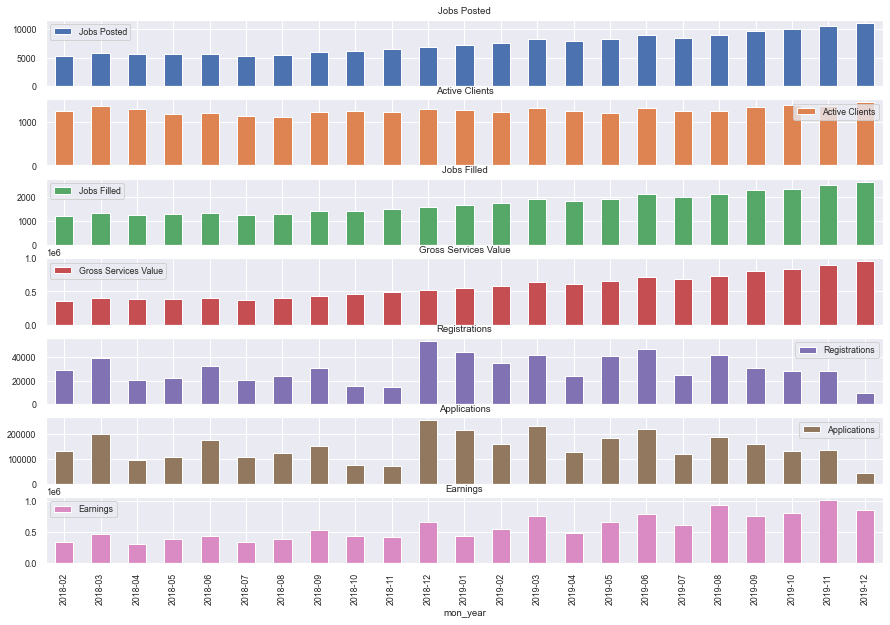

In [46]:
emea.plot(kind='bar',subplots=True,figsize = (15, 10));

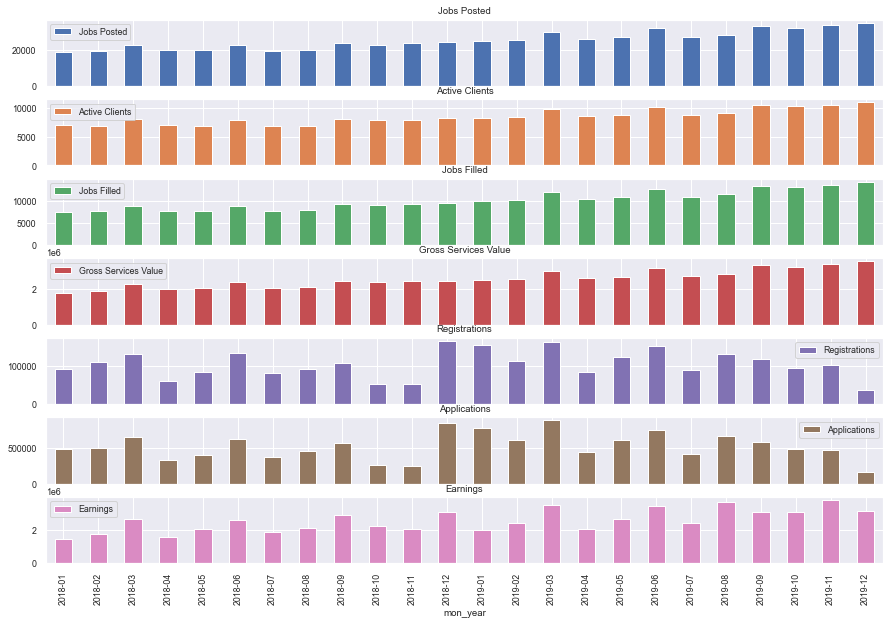

In [47]:
# Line plot
usa.plot(kind='bar',subplots=True,figsize = (15, 10));

In [48]:
usa.head()

,Region,Jobs Posted,Active Clients,Jobs Filled,Gross Services Value,Registrations,Applications,Earnings
mon_year,,,,,,,,
2018-01,North America,19000,7077,7333,1775900.0,91796,487722,1425285.60
2018-02,North America,19570,6867,7559,1867212.0,110339,496101,1773851.40
2018-03,North America,22897,8034,8852,2230305.0,129159,642737,2626454.21
2018-04,North America,19920,6989,7707,1980746.0,59746,329576,1584596.80
2018-05,North America,19920,6853,7713,2021983.0,82487,399197,2021983.01


<AxesSubplot:title={'center':'GSV vs Earnings based on USA and EMEA'}, xlabel='mon_year', ylabel='Gross Services Value'>

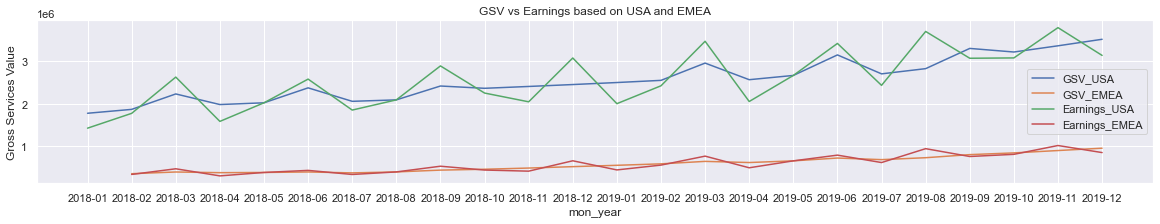

In [114]:
# GSV vs Earnings:
plt.figure(figsize = (20, 3))
plt.title('GSV vs Earnings based on USA and EMEA')
sns.lineplot(data = usa['Gross Services Value'], label = 'GSV_USA')
sns.lineplot(data = emea['Gross Services Value'], palette=['yellow'], label='GSV_EMEA')
sns.lineplot(data = usa['Earnings'], palette=['green'], label='Earnings_USA')
sns.lineplot(data = emea['Earnings'], palette=['red'], label='Earnings_EMEA')

<AxesSubplot:xlabel='mon_year', ylabel='Jobs Posted'>

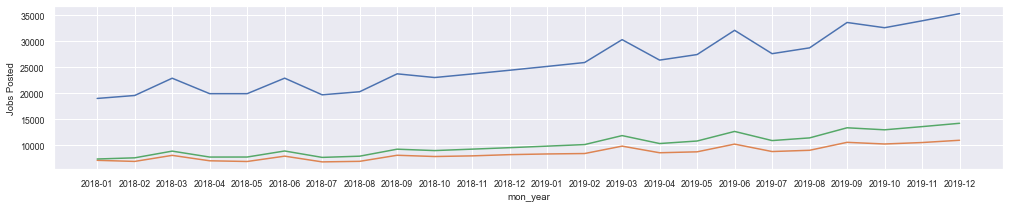

In [69]:
# Impression:
plt.figure(figsize = (17, 3))
# sns.lineplot(data = usa['Gross Services Value'])
sns.lineplot(data = usa['Jobs Posted'], palette=['red'])
sns.lineplot(data = usa['Active Clients'], palette=['green'])
sns.lineplot(data = usa['Jobs Filled'], palette=['white'])
# sns.lineplot(data = emea['Jobs Posted'], palette=['red'])
# sns.lineplot(data = emea['Active Clients'], palette=['green'])
# sns.lineplot(data = emea['Jobs Filled'], palette=['white'])
# sns.lineplot(data = usa['Registrations'], palette=['yellow'])
# sns.lineplot(data = usa['Applications'], palette=['pink'])

<AxesSubplot:xlabel='mon_year', ylabel='Registrations'>

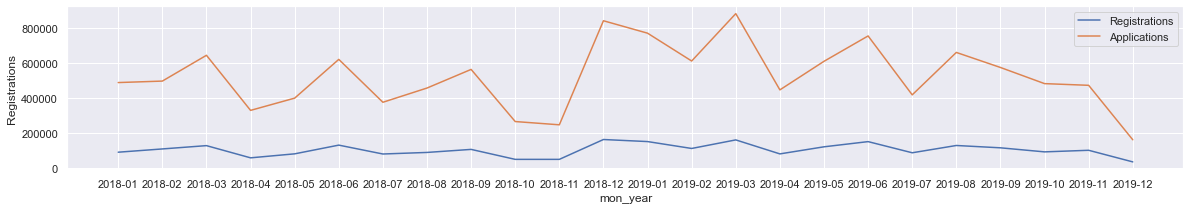

In [116]:
plt.figure(figsize = (20, 3))
sns.lineplot(data = usa['Registrations'], palette=['yellow'],label = 'Registrations')
sns.lineplot(data = usa['Applications'], palette=['pink'],label='Applications')

In [219]:
usa['job_filled_rate']=usa['Jobs Filled']/usa['Jobs Posted']*100
emea['job_filled_rate']=emea['Jobs Filled']/emea['Jobs Posted']*100

<AxesSubplot:xlabel='mon_year', ylabel='job_filled_rate'>

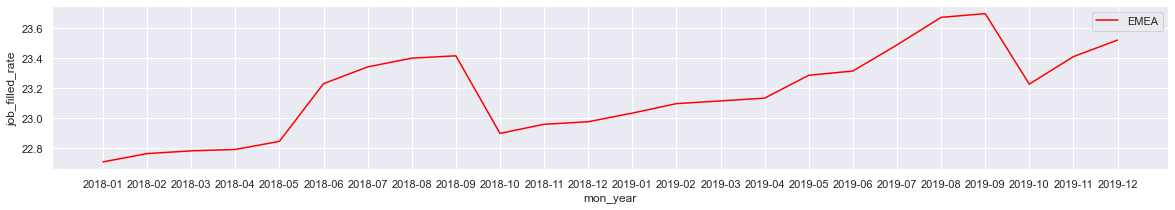

In [225]:
plt.figure(figsize = (20, 3))
# sns.lineplot(data = usa['job_filled_rate'], palette=['yellow'], label='USA')
sns.lineplot(data = emea['job_filled_rate'], color='red',label='EMEA')

In [226]:
usa['Gross Services Value']

mon_year
2018-01    1775900
2018-02    1867212
2018-03    2230305
2018-04    1980746
2018-05    2021983
2018-06    2373443
2018-07    2056573
2018-08    2090697
2018-09    2416732
2018-10    2362929
2018-11    2406151
2018-12    2451182
2019-01    2498645
2019-02    2549433
2019-03    2955700
2019-04    2565475
2019-05    2665194
2019-06    3147976
2019-07    2702576
2019-08    2825129
2019-09    3300900
2019-10    3216380
2019-11    3362442
2019-12    3515727
Name: Gross Services Value, dtype: int64

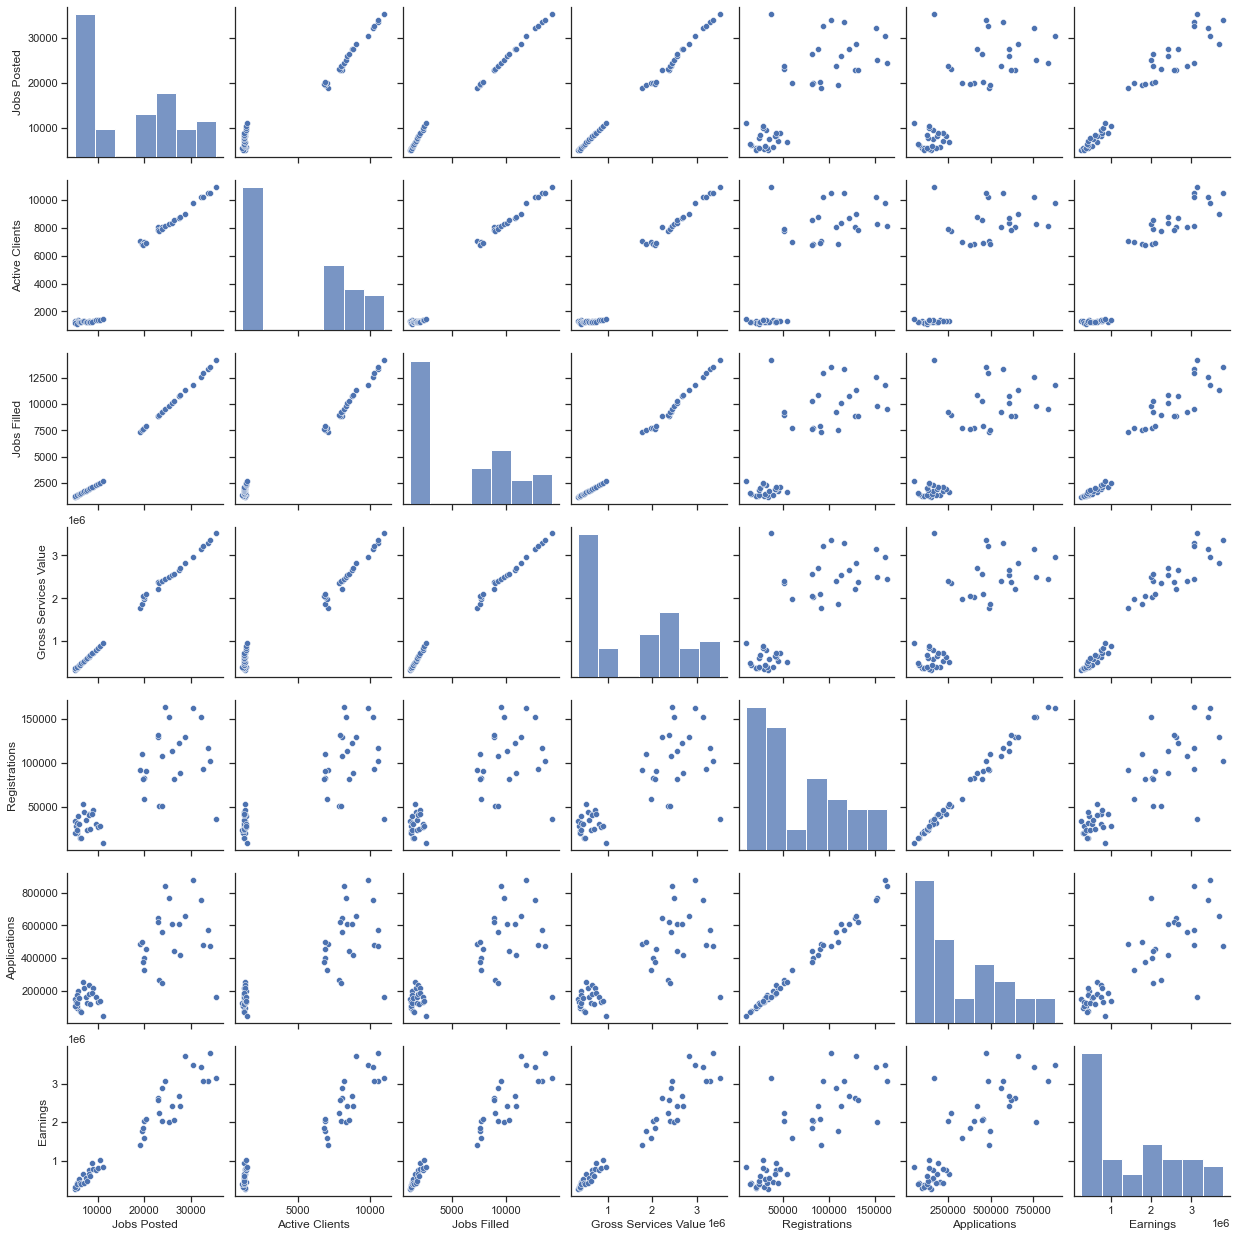

In [229]:
#before market campaign:
import seaborn as sn
sns.set(style="ticks")
pairplot1=sns.pairplot(total)
pairplot1.savefig('pairplot1.png')


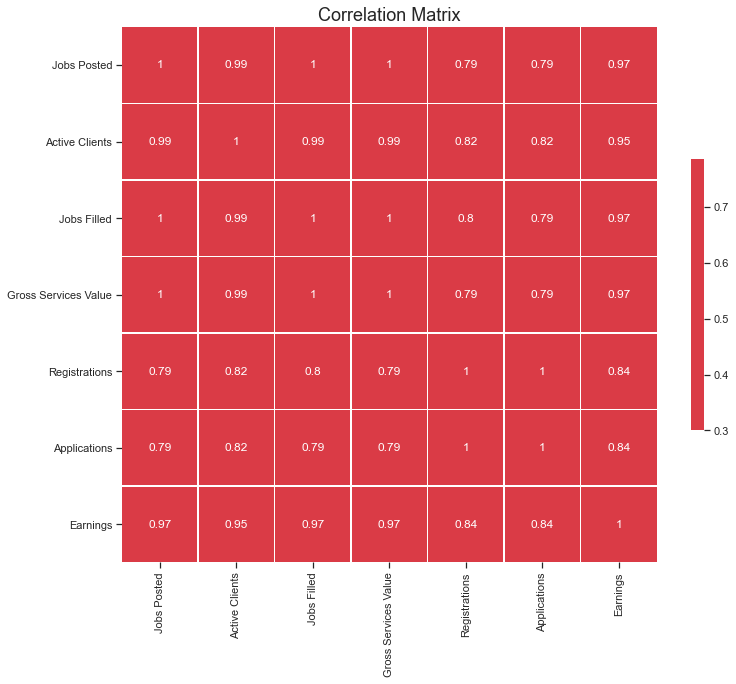

In [230]:
corr1=total.corr()
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
heatmap1=sns.heatmap(corr1,  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Variables Analysis

In [231]:
def displot(x):
    plt.figure(figsize=(10,4))
    sns.set(font_scale=1)
    plt.ticklabel_format(useOffset=False)
    sns.set_style("darkgrid")

    plt.subplot(1,2,1)
    plt.title('USA')
    sns.distplot(usa[x],color='y')

    plt.subplot(1,2,2)
    plt.title('EMEA')
    sns.distplot(emea[x])

    plt.tight_layout()
    plt.show()

In [232]:
usa.columns

Index(['Region', 'Jobs Posted', 'Active Clients', 'Jobs Filled',
       'Gross Services Value', 'Registrations', 'Applications', 'Earnings',
       'job_filled_rate'],
      dtype='object')

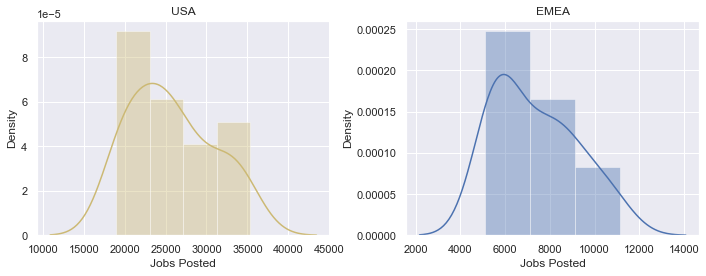

In [233]:
displot('Jobs Posted')

In [235]:
def countplot(x):
    sns.set(font_scale=1)
    plt.figure(figsize=(20,5))
    sns.set_style("darkgrid")

    plt.subplot(1,2,1)
    plt.title('USA')
    g=sns.countplot(usa[x],color='y')
    g.set(xticks=range(0,10,100), xticklabels=[i for i in range(0,10,100)])

    plt.subplot(1,2,2)
    plt.title('EMEA')
    sns.countplot(emea[x])

    plt.tight_layout()
    plt.show()
    plt.savefig('c.png')

In [236]:
def boxplot(x):
    sns.set(font_scale=1)
    plt.figure(figsize=(8,4))
    sns.set_style("darkgrid")

    plt.subplot(1,2,1)
    plt.title('USA')
    sns.boxplot(y=usa[x],color='y')

    plt.subplot(1,2,2)
    plt.title('EMEA')
    sns.boxplot(y=emea[x])

    plt.tight_layout()
    plt.show()

In [237]:
usa.columns

Index(['Region', 'Jobs Posted', 'Active Clients', 'Jobs Filled',
       'Gross Services Value', 'Registrations', 'Applications', 'Earnings',
       'job_filled_rate'],
      dtype='object')

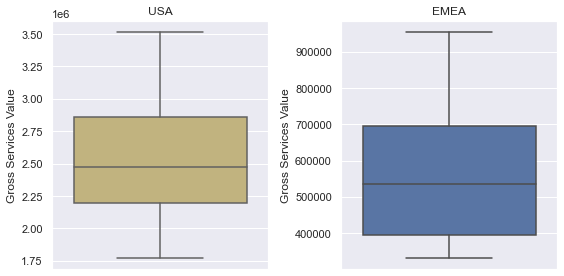

In [241]:
boxplot('Gross Services Value')

# Data modeling:
Notes: App Search impressions are the target
- 1. Get one-hot encoding for categorical data
- 2. Normalization data
- 3. GridSearch to find best model
- 4. Feature selection based on Multiple linear regression, random forest, and RFECV


In [70]:
total.head()

,mon_year,Region,Jobs Posted,Active Clients,Jobs Filled,Gross Services Value,Registrations,Applications,Earnings
0,2018-01,EMEA,5100,1308,1158,333375.0,33839,148148,267761.86
1,2018-01,North America,19000,7077,7333,1775900.0,91796,487722,1425285.60
2,2018-02,EMEA,5360,1264,1220,354612.0,28868,132695,336881.40
3,2018-02,North America,19570,6867,7559,1867212.0,110339,496101,1773851.40
4,2018-03,EMEA,5843,1377,1331,394464.0,39472,198404,470202.20


In [72]:
total_model=total.iloc[:,1:]

In [75]:
#One-hot encoding for category data
df=pd.get_dummies(total_model)

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=df.drop(columns={'Gross Services Value'}, axis=1)
y=df['Gross Services Value']
# Normalization:
scaler = StandardScaler()
scaler.fit_transform(X, y)
# Spliting data set:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,
                                         random_state=2021)

### Random Forest

In [153]:
df.columns

Index(['JobsPosted', 'ActiveClients', 'JobsFilled', 'GrossServicesValue',
       'Registrations', 'Applications', 'Earnings', 'Region_EMEA',
       'Region_NorthAmerica'],
      dtype='object')

Text(0.5, 1.0, 'Visualizing Important Features')

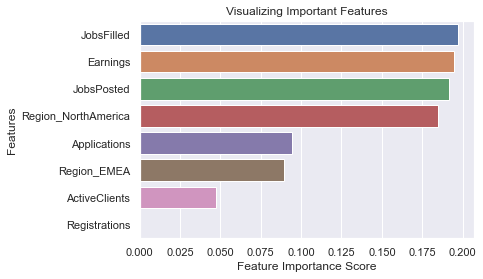

In [154]:
from sklearn.ensemble import RandomForestRegressor
# use 10 trees for starter and just default setting to train the first ensembled tree
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X_train, y_train)
feature_imp = pd.Series(regressor.feature_importances_,index=['JobsPosted', 'ActiveClients', 'JobsFilled', 
       'Registrations', 'Applications', 'Earnings', 'Region_EMEA',
       'Region_NorthAmerica']).sort_values(ascending=False)
feature_imp
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

# RFE cross-validation

In [165]:
>>> from sklearn.feature_selection import RFECV
>>> from sklearn.svm import SVR
>>> estimator = SVR(kernel="linear")
>>> selector = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
>>> selector = selector.fit(X_train, y_train)

In [166]:
df3=pd.DataFrame()
df3['col']=['JobsPosted', 'ActiveClients', 'JobsFilled', 
       'Registrations', 'Applications', 'Earnings', 'Region_EMEA',
       'Region_NorthAmerica']
df3['rank']=selector.ranking_

In [167]:
df3.sort_values(by='rank')

,col,rank
1,ActiveClients,1
2,JobsFilled,1
3,Registrations,1
4,Applications,1
5,Earnings,1
0,JobsPosted,2
7,Region_NorthAmerica,3
6,Region_EMEA,4


In [168]:
selector.ranking_

array([2, 1, 1, 1, 1, 1, 4, 3])

Text(0.5, 1.0, 'Visualizing Important Features')

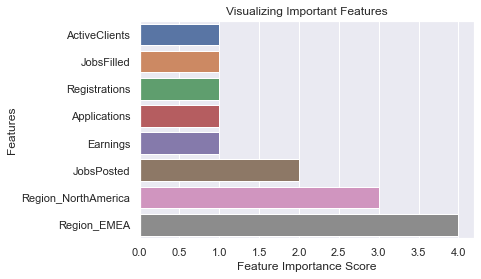

In [171]:
feature_imp = pd.Series(selector.ranking_,index=['JobsPosted', 'ActiveClients', 'JobsFilled', 
       'Registrations', 'Applications', 'Earnings', 'Region_EMEA',
       'Region_NorthAmerica']).sort_values()
feature_imp
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

# Multiple Linear Regression

In [128]:
from sklearn import datasets
from sklearn.feature_selection import RFE # recursive feature elimination
from sklearn.linear_model import LogisticRegression

lr=LinearRegression()

In [135]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LinearRegression()
modelCV.fit(X_train, y_train)
scoring = 'accuracy'
y_pred=cross_val_score(modelCV, X_train, y_train)
# results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
# print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [136]:
modelCV.coef_

array([ 9.75781713e+01, -1.56005083e+01, -3.41208369e-01, -1.24143554e+00,
        9.69725859e-02,  5.53817077e-02, -1.18041881e+05,  1.18041881e+05])

In [137]:
feature_imp = pd.Series(modelCV.coef_,index=X_train .columns).sort_values(ascending=False)
feature_imp

Region_North America    118041.881231
Jobs Posted                 97.578171
Applications                 0.096973
Earnings                     0.055382
Jobs Filled                 -0.341208
Registrations               -1.241436
Active Clients             -15.600508
Region_EMEA            -118041.881231
dtype: float64

## Linear Regression

In [ ]:
df.columns=[i.replace(" ","") for i in df.columns]

In [84]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
from sklearn import metrics
mod = smf.ols(formula = 'GrossServicesValue~JobsPosted+ActiveClients+JobsFilled+Registrations+Applications+Earnings', data = df)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     GrossServicesValue   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4786.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           1.10e-56
Time:                        19:43:58   Log-Likelihood:                -576.74
No. Observations:                  48   AIC:                             1167.
Df Residuals:                      41   BIC:                             1181.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.438e+05   5.49e+04     -4.441